# Notebook to look at Effect of New Boundary Conditions on the Biology #

Plots are: from rest with T, S and biology from Apr 24.  Run for almost two days.  Compare at local noon on the second day.

left plots: current nowcast bathymetry (downbyone) and boundary conditions (convection for baroclinic velocity)
centre plots: new bathymetry (downbyone2) and current boundary conditions (convection for baroclinic velocity)
right plots: new bathymetry (downbyone2) and orlanksi radiation boundary conditions

In [1]:
import datetime
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import os

from salishsea_tools import tidetools
from salishsea_tools import viz_tools

%matplotlib inline

/home/sallen/anaconda/envs/py3/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
def results_dataset(results_dir, date, ndays, period, grid_type):
    datestr = date.strftime('%Y%m%d')
    dateend = date + datetime.timedelta(days=ndays-1)
    dateendstr = dateend.strftime('%Y%m%d')
    fname = os.path.join(results_dir,
                        'SalishSea_{}_{}_{}_{}.nc'.format(period, datestr, dateendstr, grid_type))
    print (fname)
    grid = nc.Dataset(fname)
    return grid

In [3]:
mesh_mask_1 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone.nc')
tmask_1 = 1 - mesh_mask_1.variables['tmask'][:]
deptht = mesh_mask_1.variables['gdept_1d'][0]

mesh_mask_2 = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/mesh_mask_downbyone2.nc')
tmask_2 = 1 - mesh_mask_2.variables['tmask'][:]

grid_B = nc.Dataset('/ocean/sallen/allen/research/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

In [4]:
one = '/ocean/sallen/allen/research/MEOPAR/myResults/openboundaries/convection/oldbathy_green/day2/'
two = '/ocean/sallen/allen/research/MEOPAR/myResults/openboundaries/convection/newbathy_green/day2/'
three = '/ocean/sallen/allen/research/MEOPAR/myResults/openboundaries/orl/newbathy_green/day2/'
date = datetime.datetime(2016, 4, 26)
NCone = results_dataset(one, date, 1, '1h', 'ptrc_T')
NCtwo = results_dataset(two, date, 1, '1h', 'ptrc_T')
NCthree = results_dataset(three, date, 1, '1h', 'ptrc_T')
noon = 12 + 8
#print (NCthree.variables.keys())
variables = ['DOC', 'MICZ', 'MYRI', 'NH4', 'NO3', 'O2', 'PHY', 'PHY2', 'POC', 'Si', 'bSi']
qtys_one = {}; qtys_two = {}; qtys_three = {}
#print (nitrateF.shape)

/ocean/sallen/allen/research/MEOPAR/myResults/openboundaries/convection/oldbathy_green/day2/SalishSea_1h_20160426_20160426_ptrc_T.nc
/ocean/sallen/allen/research/MEOPAR/myResults/openboundaries/convection/newbathy_green/day2/SalishSea_1h_20160426_20160426_ptrc_T.nc
/ocean/sallen/allen/research/MEOPAR/myResults/openboundaries/orl/newbathy_green/day2/SalishSea_1h_20160426_20160426_ptrc_T.nc


In [5]:
def load_results(dataset, mask, variables, time):
    for v in variables:
        qty[v] = np.ma.masked_array(dataset.variables[v][time,:], mask[0])
    return qty

In [6]:
for qty, dataset, mask in zip([qtys_one, qtys_two, qtys_three], [NCone, NCtwo, NCthree], 
                              [tmask_1, tmask_2, tmask_2]):
    qty = load_results(dataset, mask, variables, noon)
quantities = [qtys_one, qtys_two, qtys_three]

In [7]:
ib = 878; ie=898; jb=38; je=68
cmap = plt.get_cmap('viridis')
cmap.set_bad('burlywood')

In [8]:
def make_plot(idepth, variables, quantities, ib, ie, jb, je, cmap, deptht):
    fig, ax = plt.subplots(11, 3, figsize=(15,33))
    for ja, variable in enumerate(variables):
        for ia, qty in enumerate([qtys_one, qtys_two, qtys_three]):
            mesh = ax[ja, ia].pcolormesh(qty[variable][idepth, ib:ie, jb:je], cmap=cmap)
            fig.colorbar(mesh, ax=ax[ja, ia])
            viz_tools.set_aspect(ax[ja, ia])
        ax[ja, 0].set_title('Depth = '+str(deptht[idepth])+'m, '+variable)

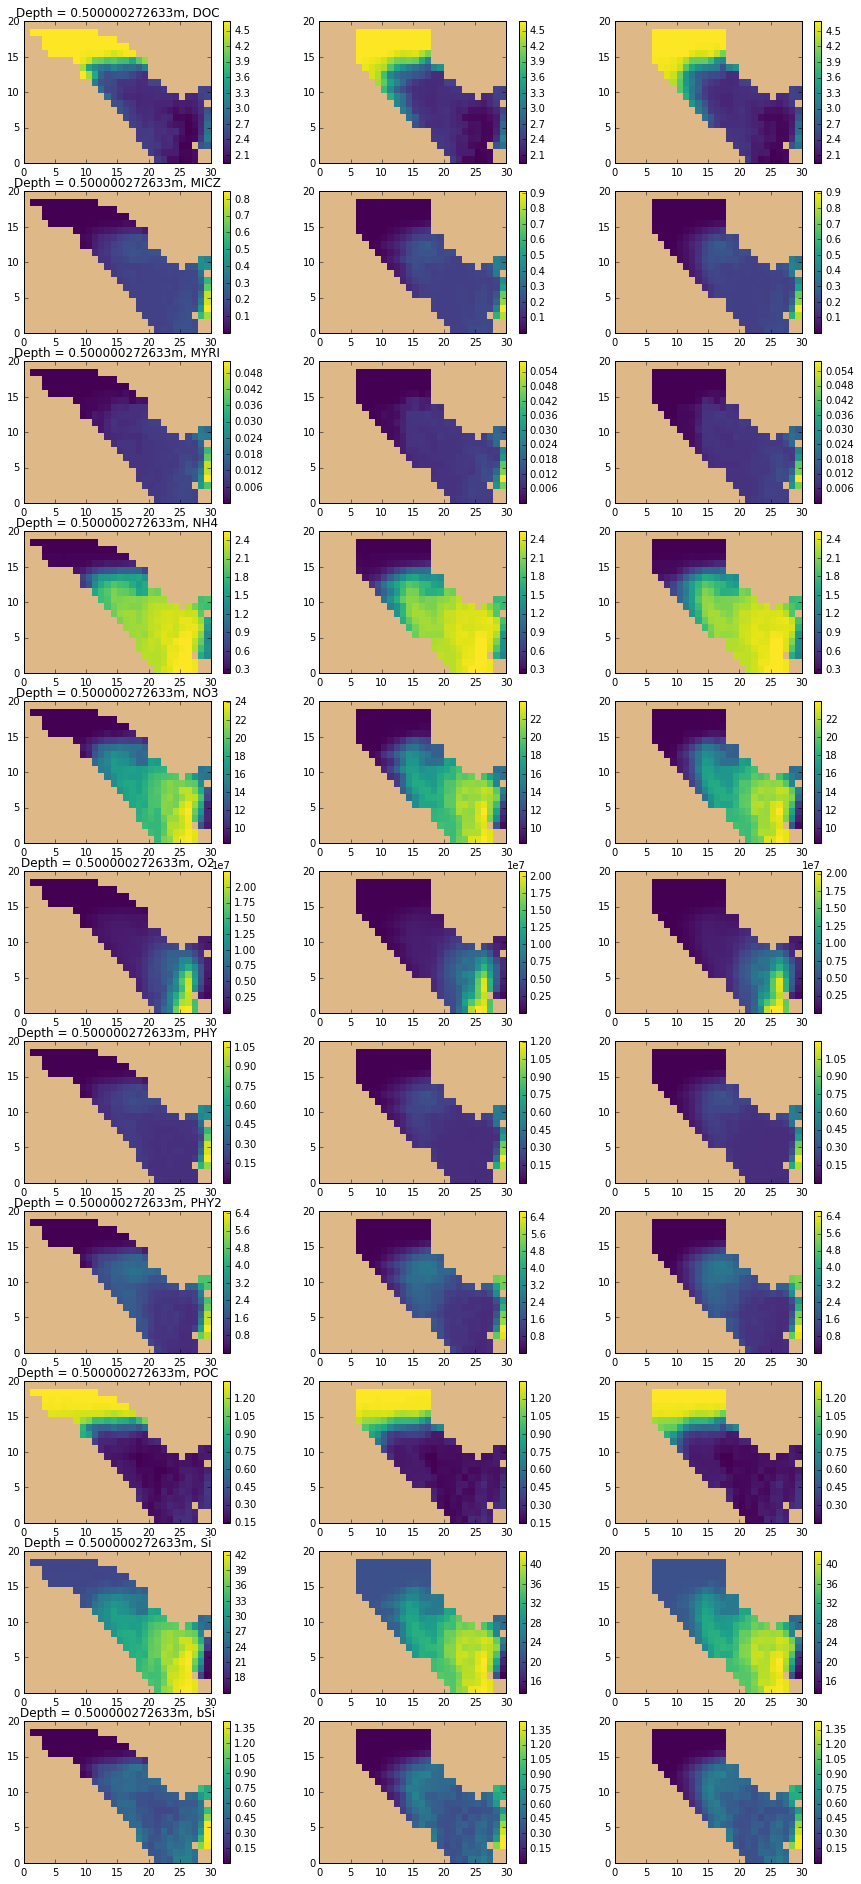

In [9]:
make_plot(0, variables, quantities, ib, ie, jb, je, cmap, deptht)

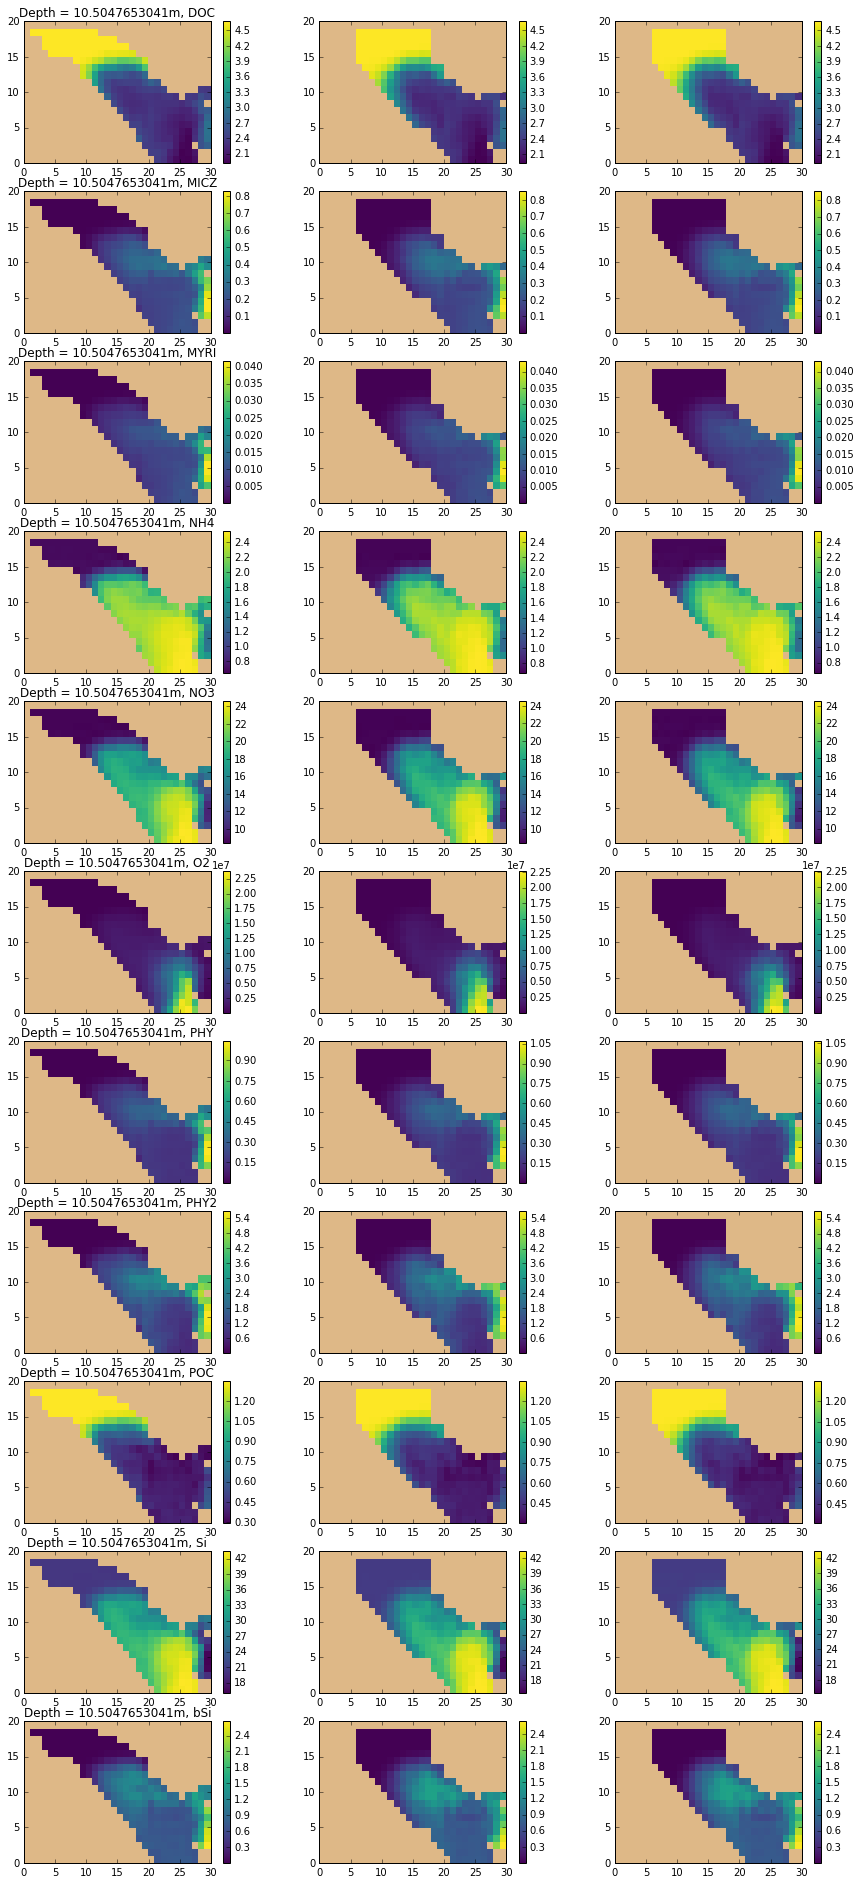

In [10]:
make_plot(10, variables, quantities, ib, ie, jb, je, cmap, deptht)

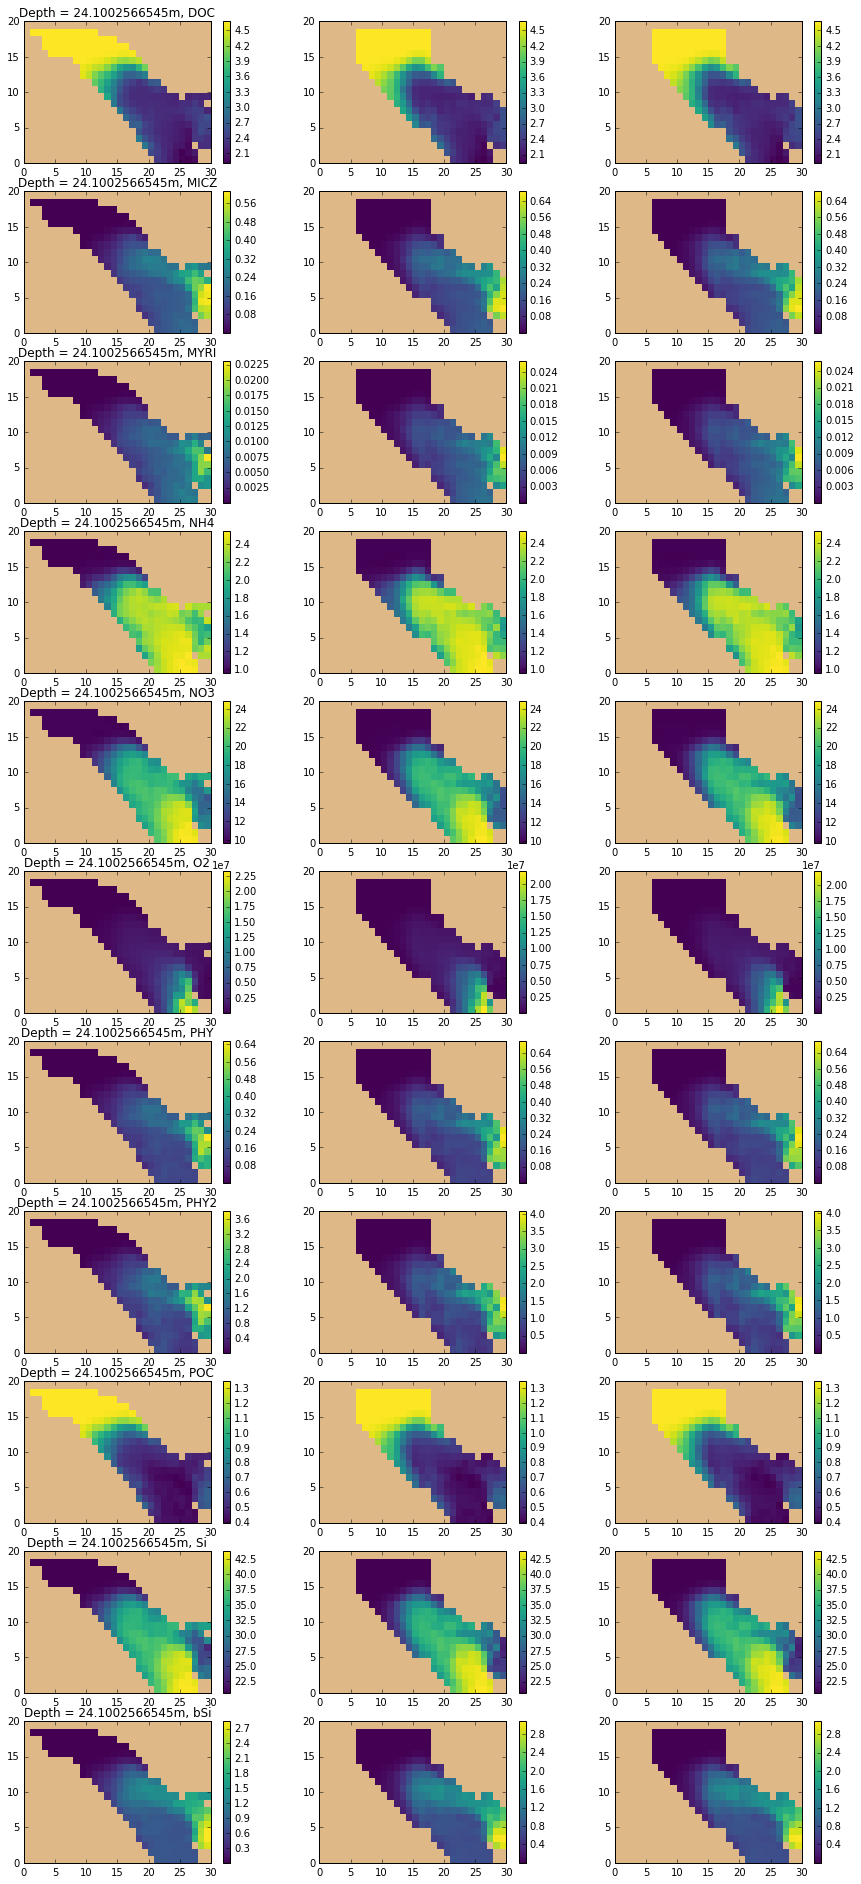

In [11]:
make_plot(20, variables, quantities, ib, ie, jb, je, cmap, deptht)

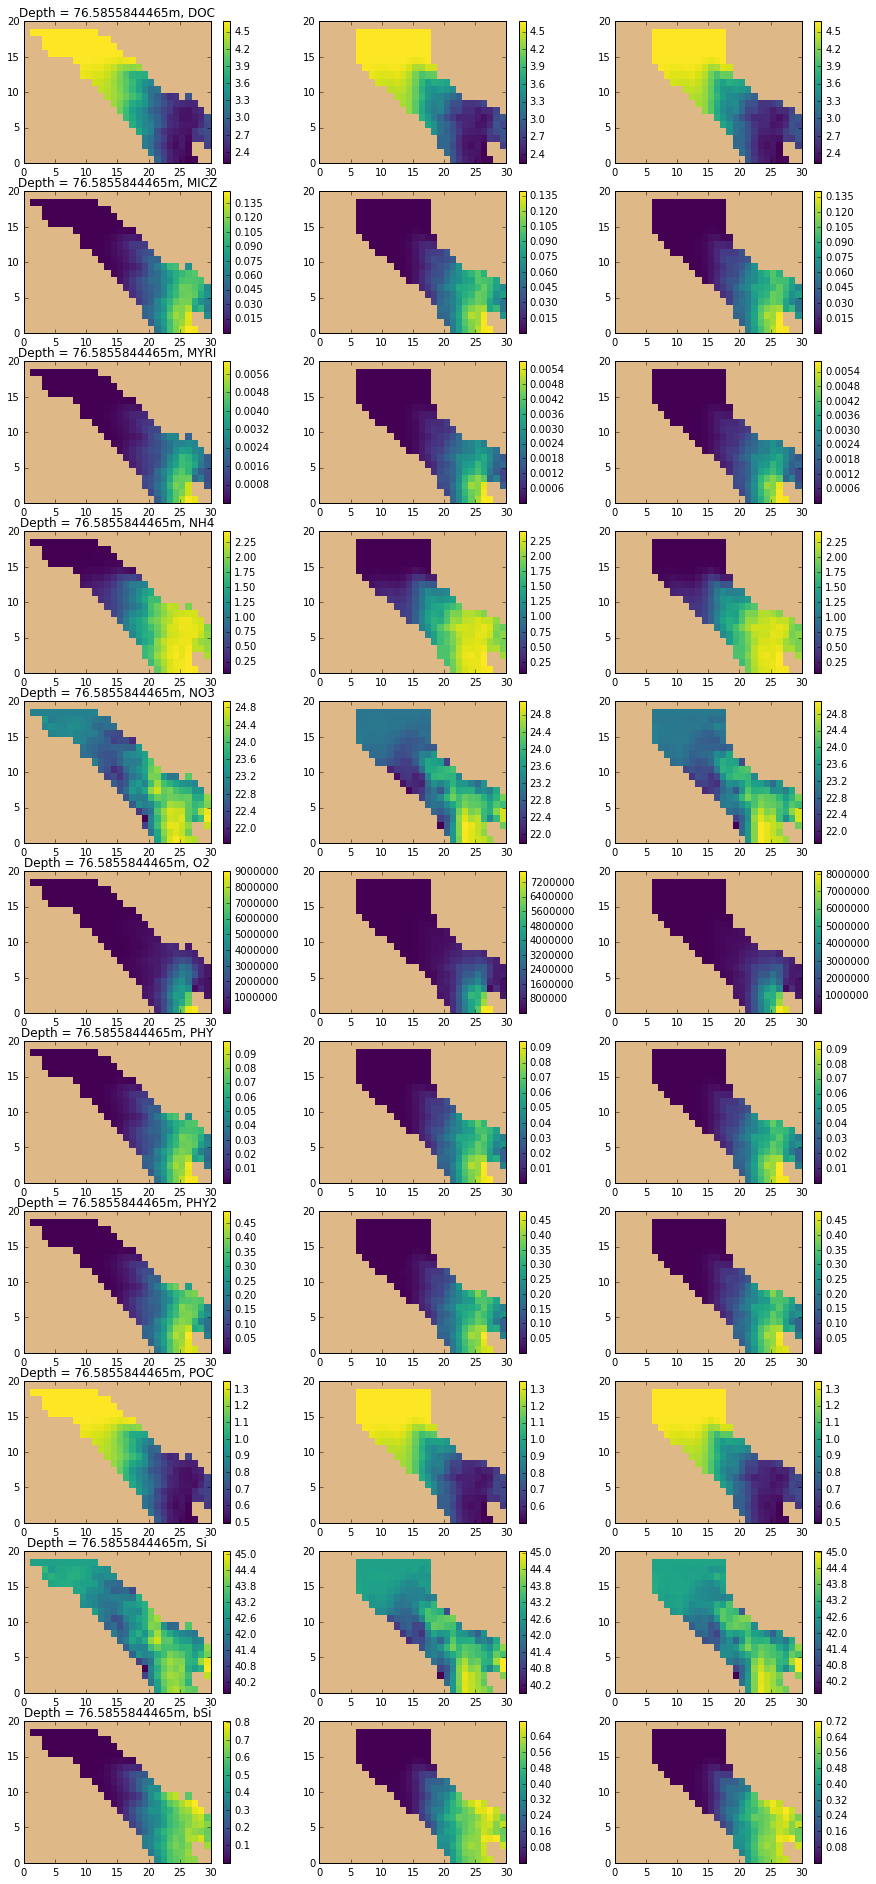

In [12]:
make_plot(25, variables, quantities, ib, ie, jb, je, cmap, deptht)

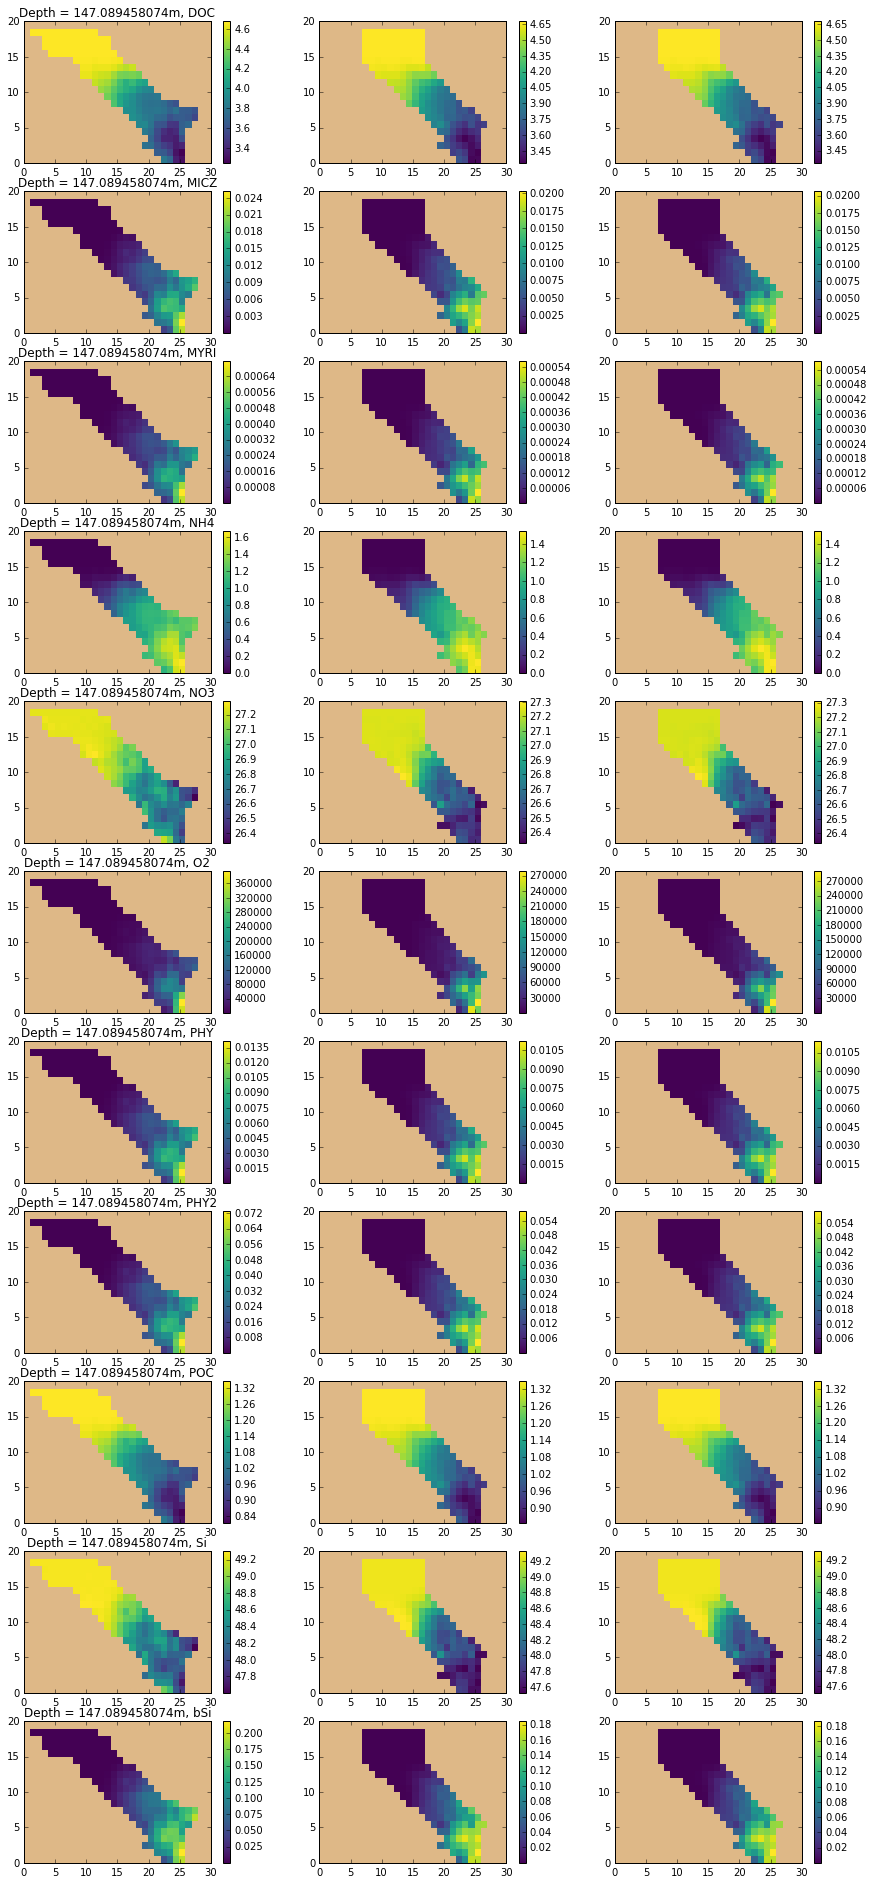

In [13]:
make_plot(28, variables, quantities, ib, ie, jb, je, cmap, deptht)

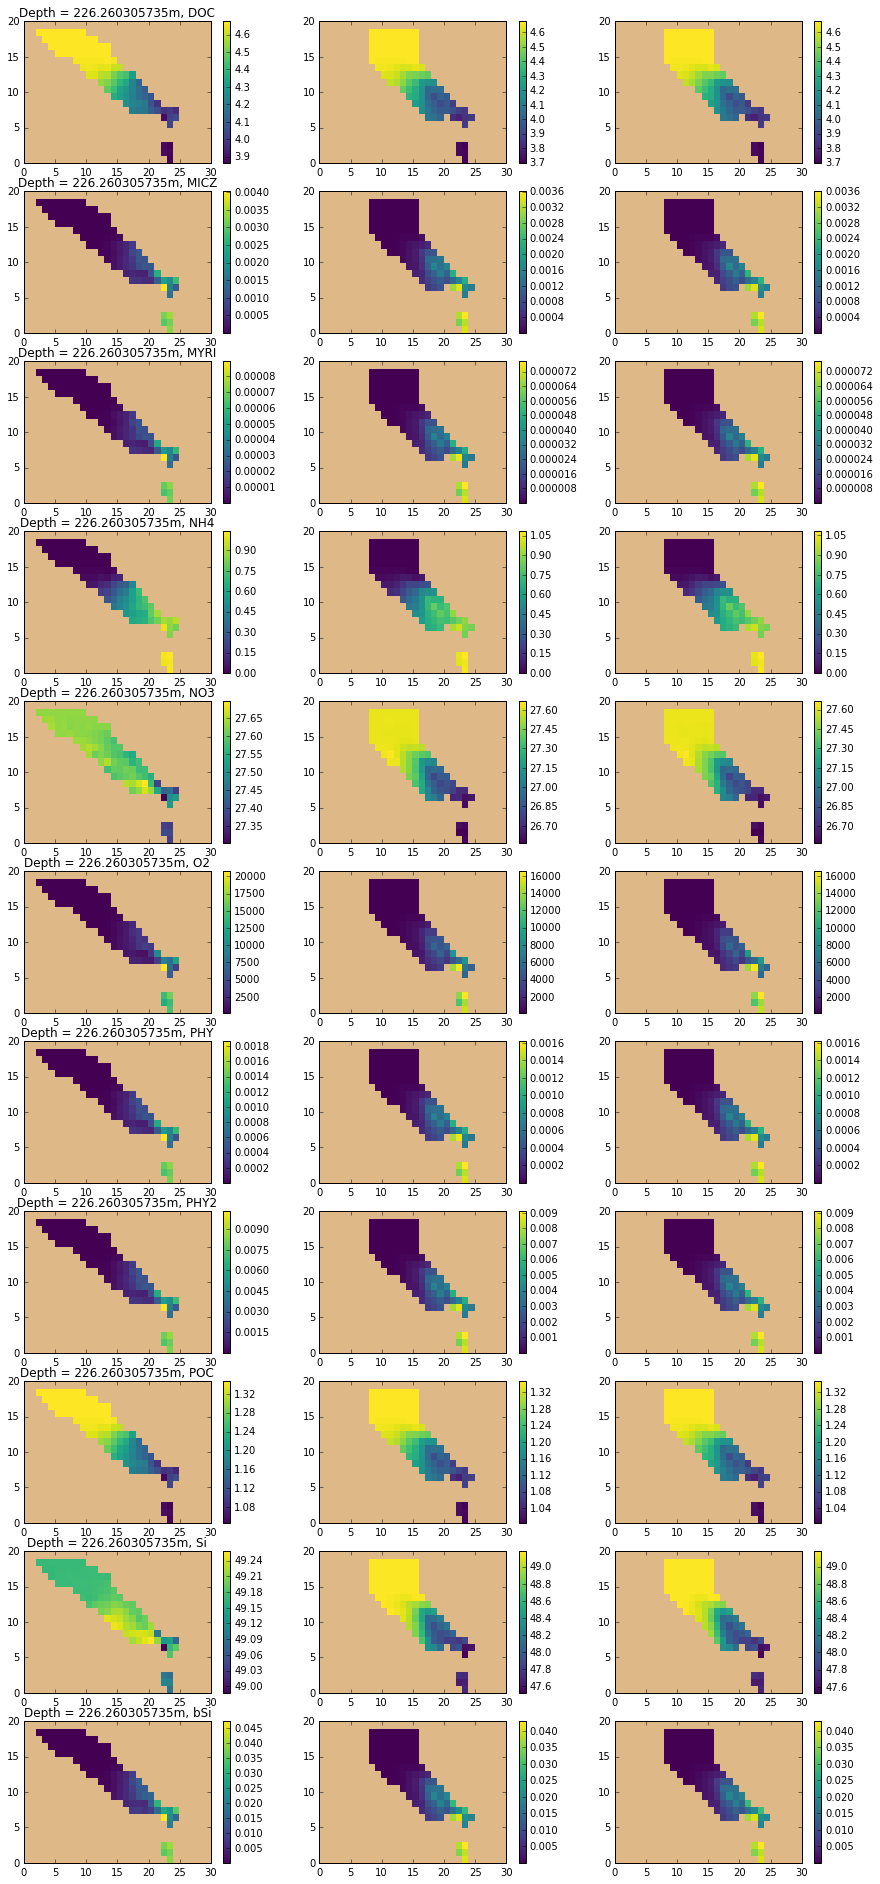

In [14]:
make_plot(31, variables, quantities, ib, ie, jb, je, cmap, deptht)

In [15]:
ib = 360; ie=460; jb=0; je=100

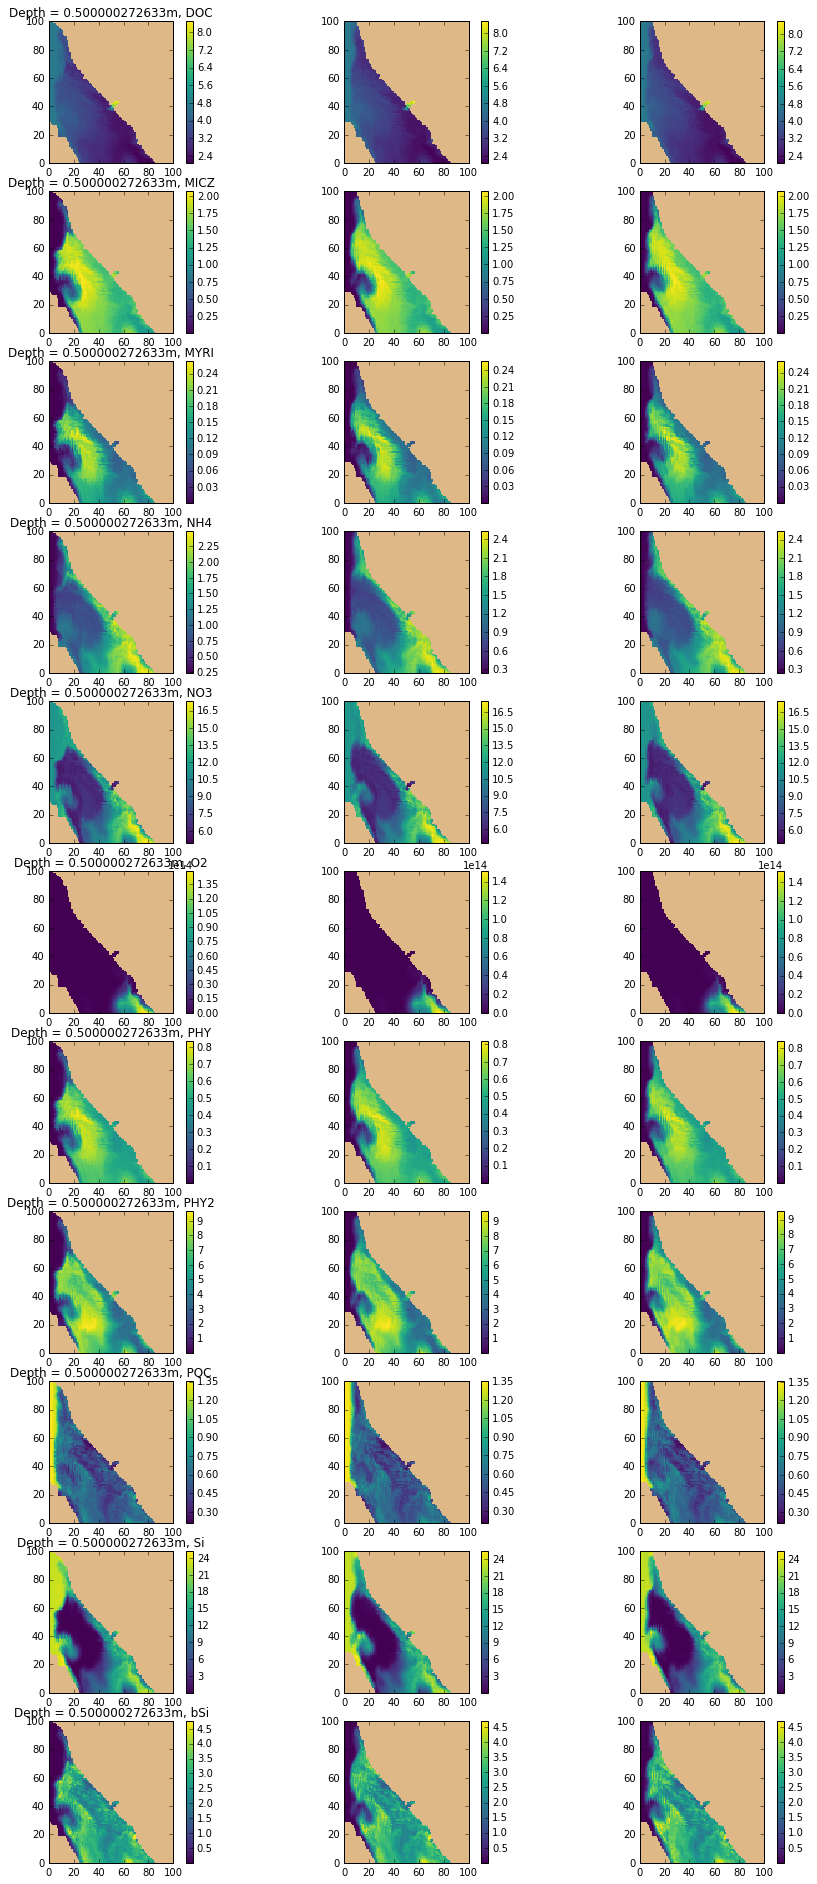

In [16]:
make_plot(0, variables, quantities, ib, ie, jb, je, cmap, deptht)

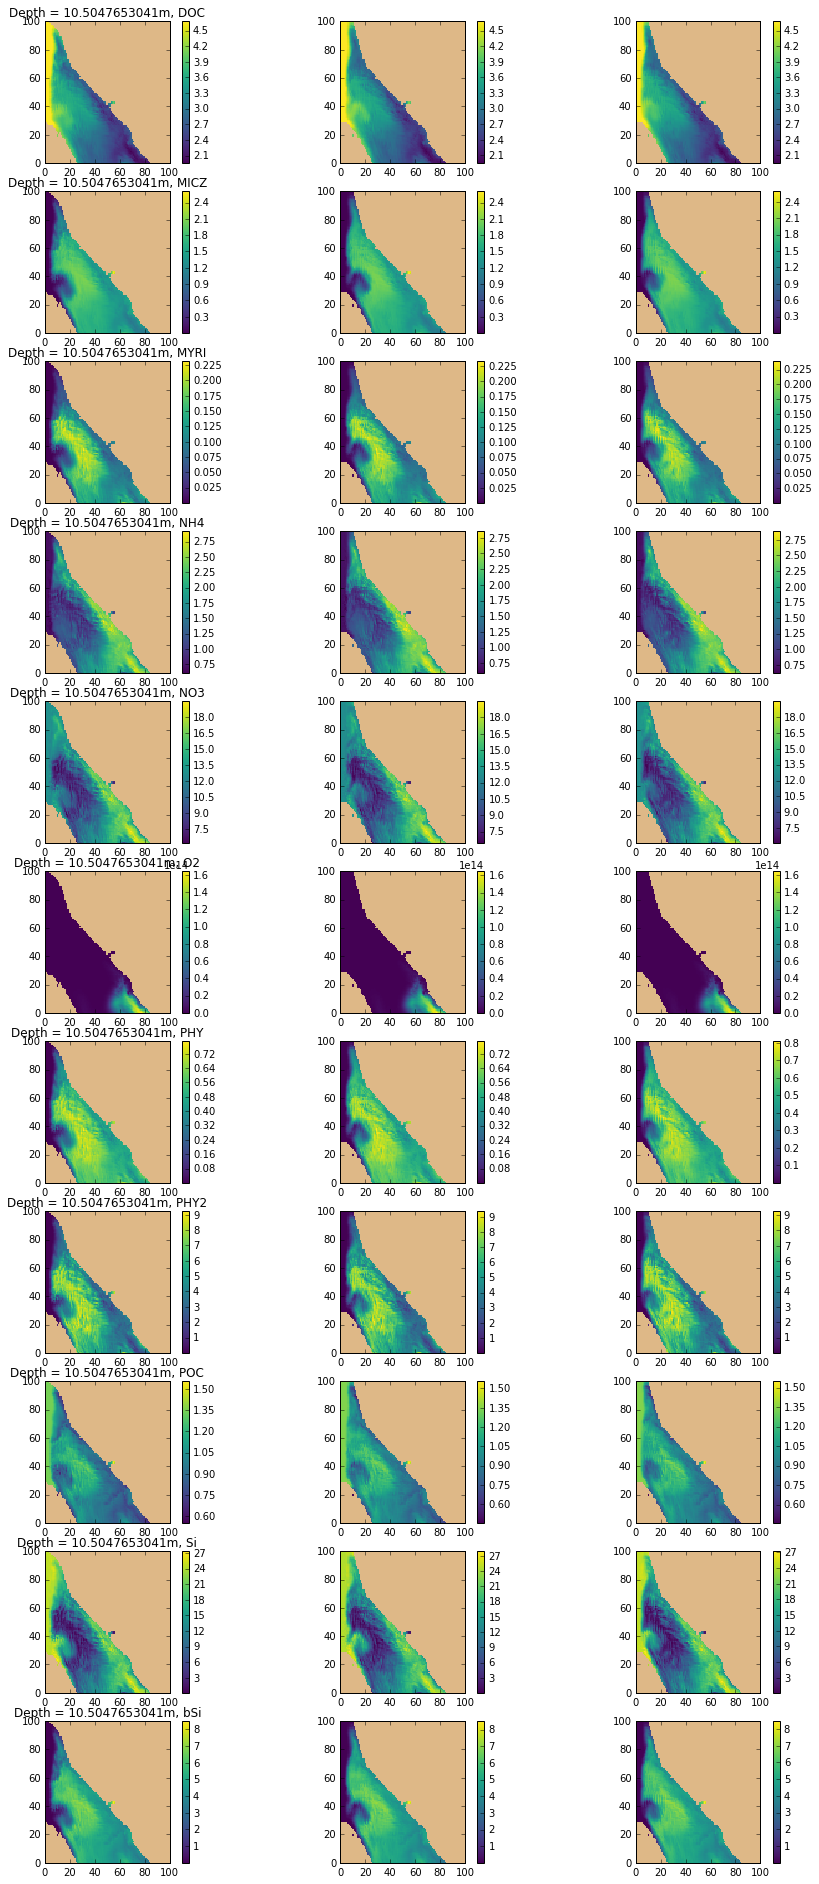

In [17]:
make_plot(10, variables, quantities, ib, ie, jb, je, cmap, deptht)

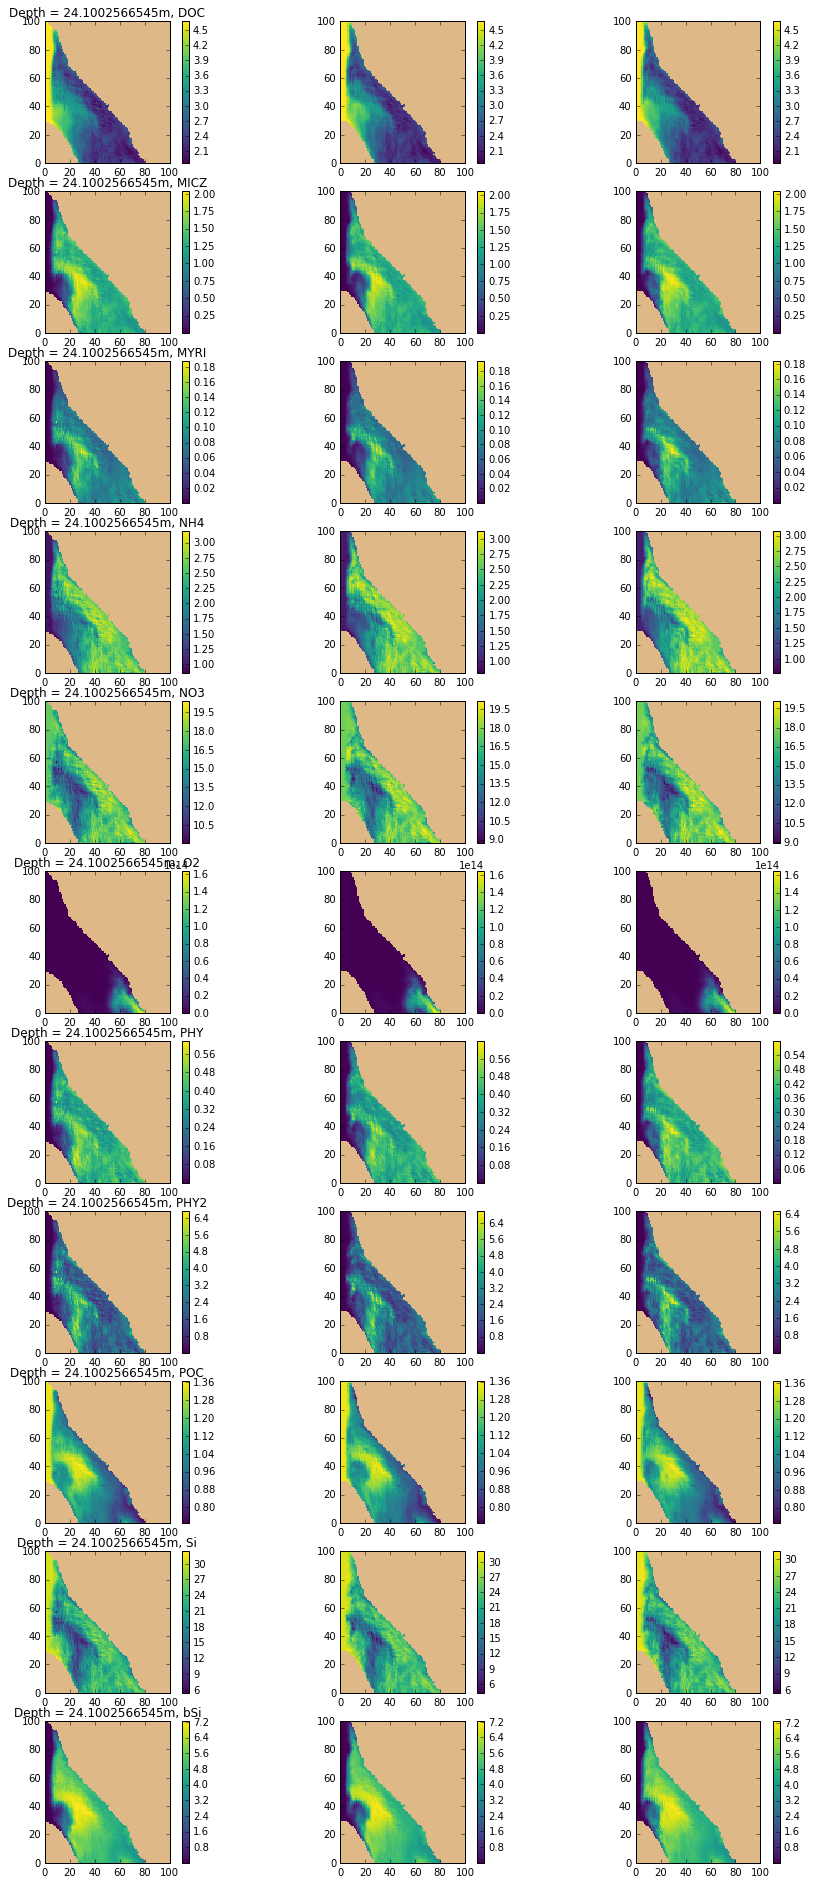

In [18]:
make_plot(20, variables, quantities, ib, ie, jb, je, cmap, deptht)

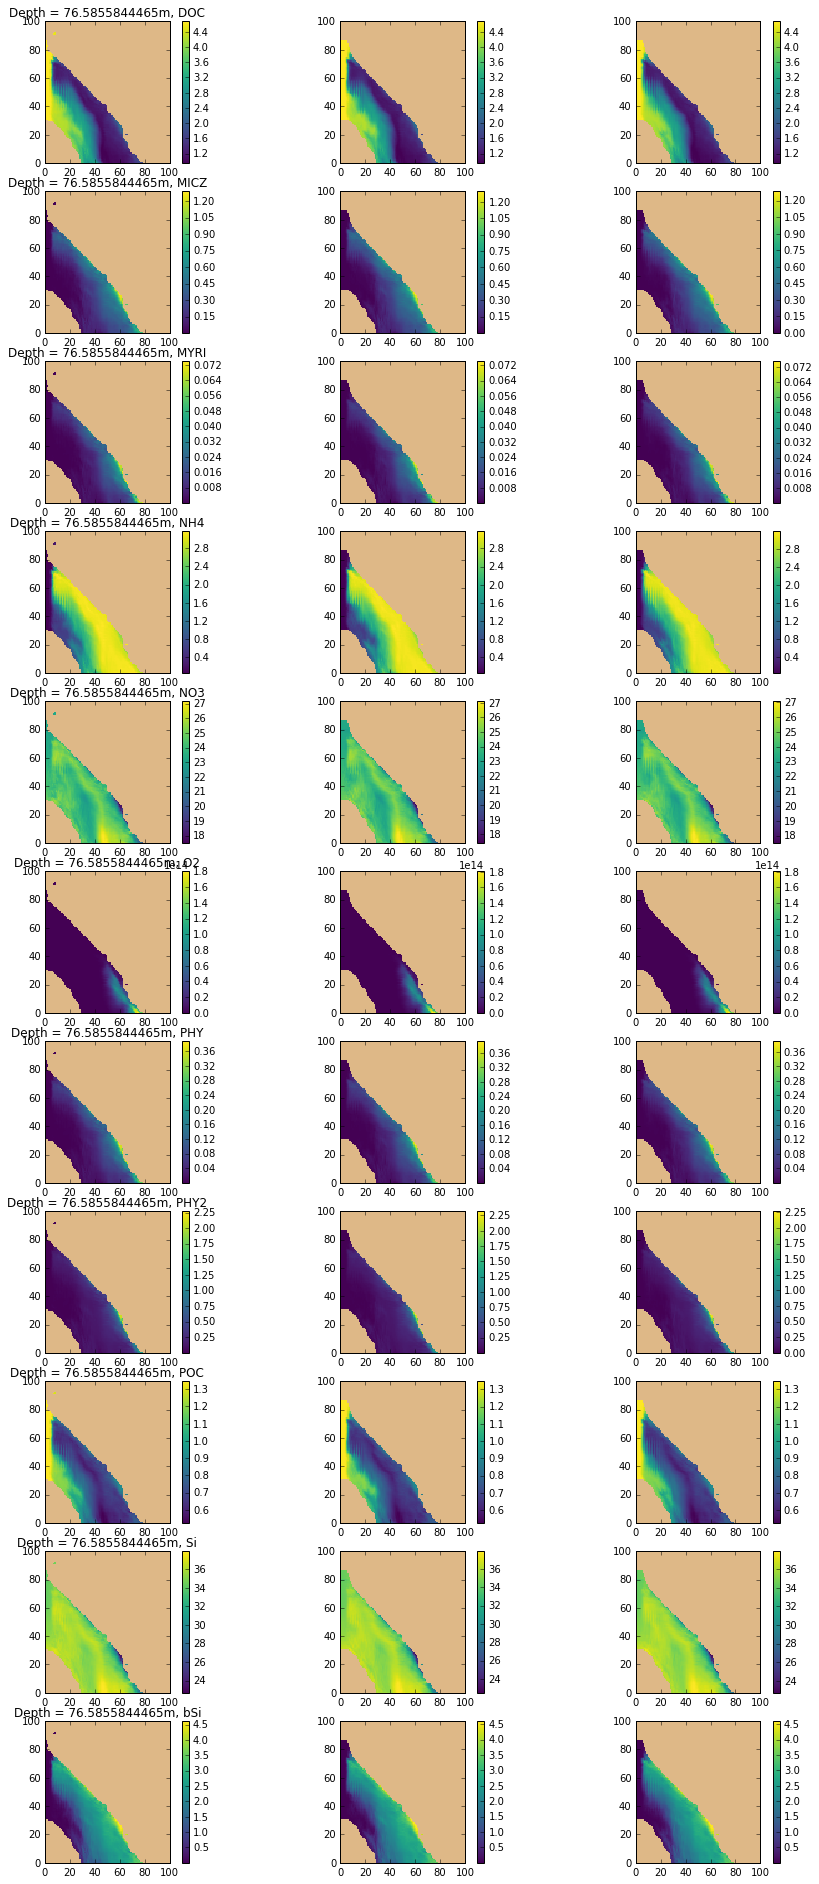

In [19]:
make_plot(25, variables, quantities, ib, ie, jb, je, cmap, deptht)

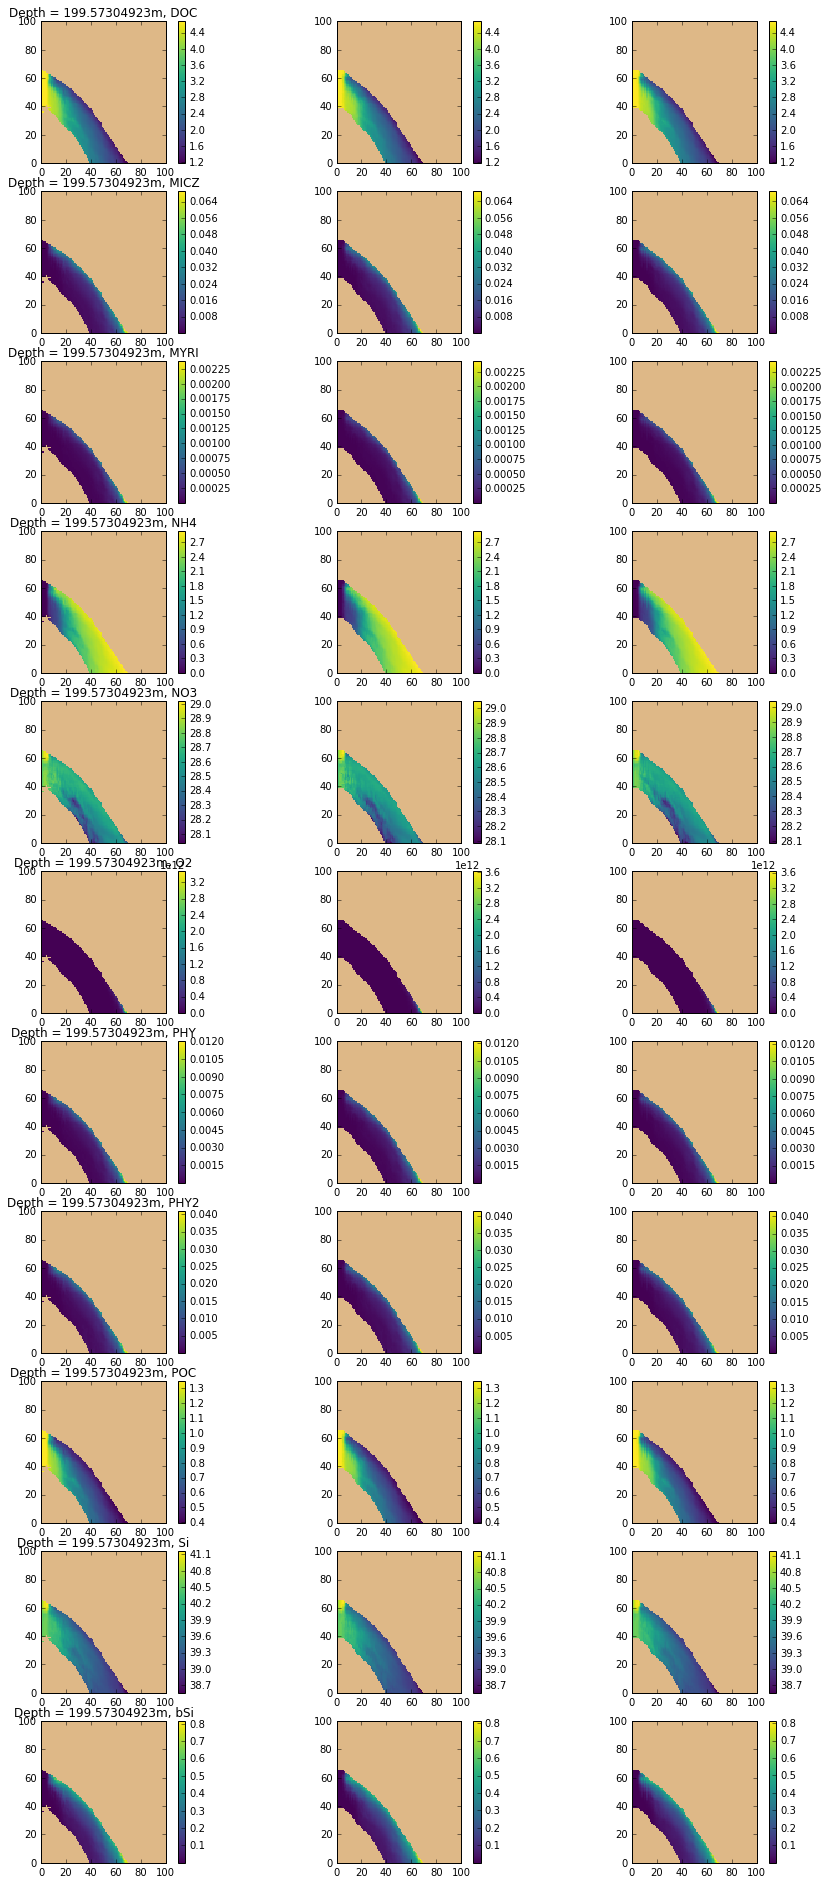

In [20]:
make_plot(30, variables, quantities, ib, ie, jb, je, cmap, deptht)

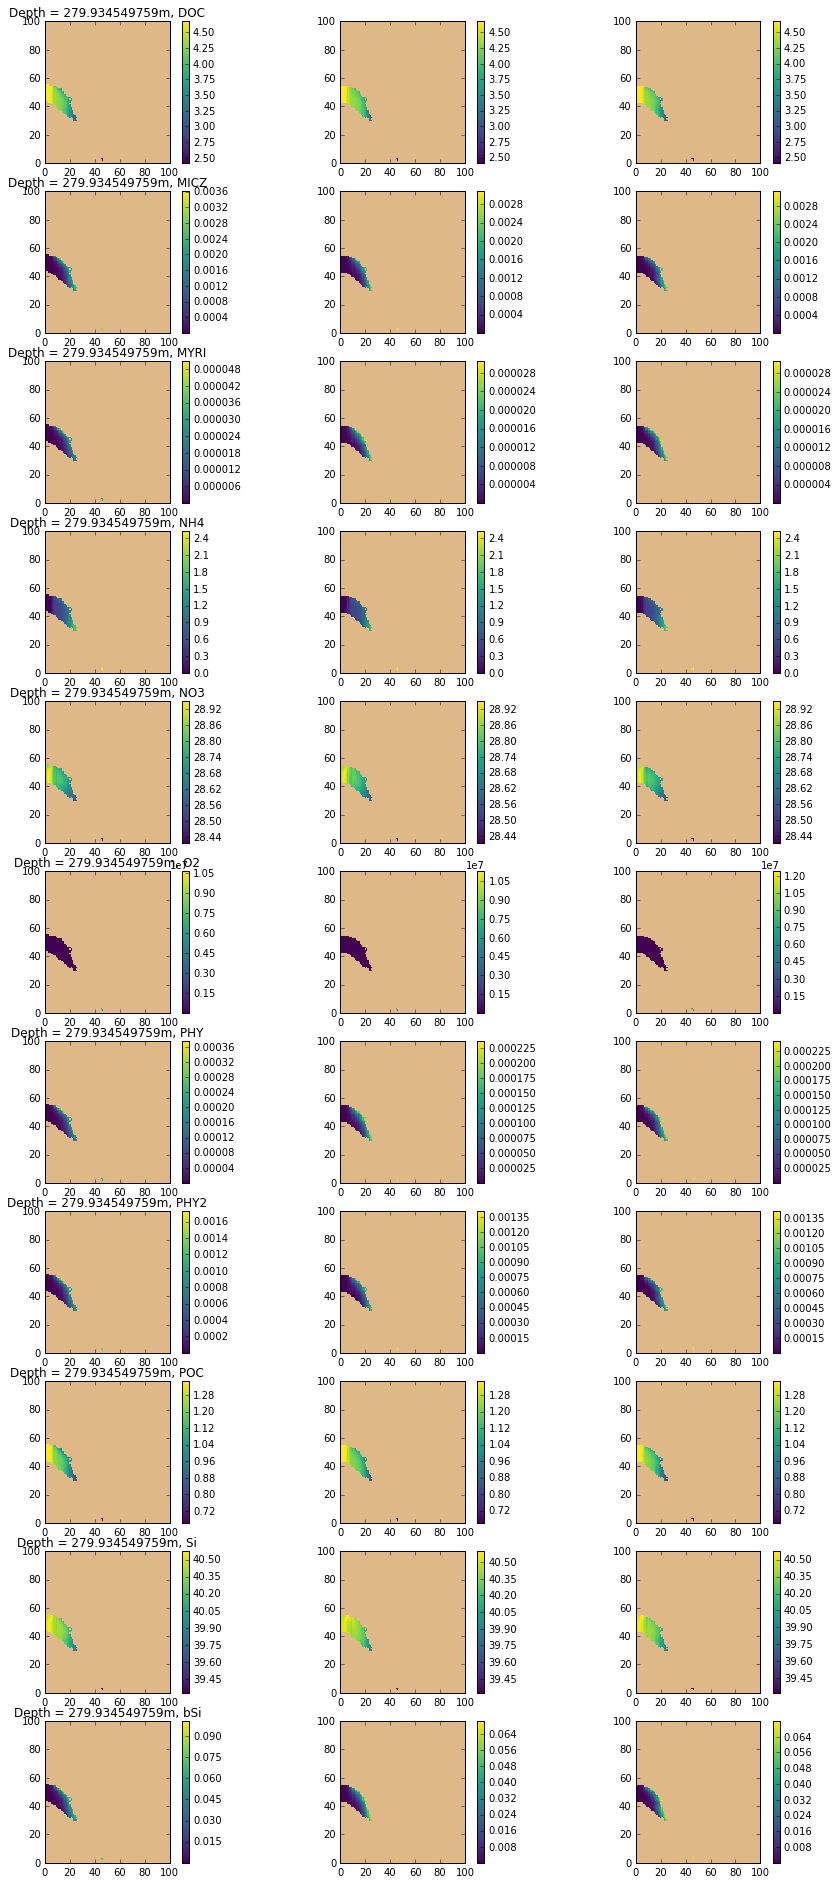

In [21]:
make_plot(33, variables, quantities, ib, ie, jb, je, cmap, deptht)